<a href="https://colab.research.google.com/github/Shrey-Viradiya/EDA/blob/master/EDA_January_Flight_Delay_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA - January Flight Delay Prediction

In [1]:
# Get Data
! mkdir ~/.kaggle
! cp '/content/drive/My Drive/kaggle.json' ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d divyansh22/flight-delay-prediction
! unzip flight-delay-prediction.zip -d data

 57% 13.0M/22.9M [00:00<00:00, 66.5MB/s]
100% 22.9M/22.9M [00:00<00:00, 76.2MB/s]
Archive:  flight-delay-prediction.zip
  inflating: data/Jan_2019_ontime.csv  
  inflating: data/Jan_2020_ontime.csv  


## Import Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
df2020 = pd.read_csv('/content/data/Jan_2020_ontime.csv')
df2019 = pd.read_csv('/content/data/Jan_2019_ontime.csv')

In [4]:
df2020['Date'] = pd.to_datetime('2020-01-' + df2020['DAY_OF_MONTH'].apply(str))
df2020['day_name']=df2020['Date'].dt.day_name()

In [5]:
df2020.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,Date,day_name
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN,2020-01-01,Wednesday
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN,2020-01-01,Wednesday
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN,2020-01-01,Wednesday
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN,2020-01-01,Wednesday
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN,2020-01-01,Wednesday


In [6]:
df2020.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21', 'Date', 'day_name'],
      dtype='object')

In [7]:
df2020['OP_CARRIER'].unique()

array(['EV', 'WN', 'MQ', 'B6', 'HA', 'AA', 'F9', 'YX', '9E', 'YV', 'OH',
       'NK', 'DL', 'OO', 'UA', 'G4', 'AS'], dtype=object)

In [8]:
df_carieer = pd.DataFrame(df2020['OP_CARRIER'].value_counts().reset_index().values, columns=['OP_CARRIER', 'AggregateOP'])
df_carieer= df_carieer.sort_values('AggregateOP',ascending=False)
fig = px.bar(df_carieer, y='AggregateOP', x='OP_CARRIER', text='AggregateOP', opacity = 0.8)
fig.update_traces(texttemplate='%{text:.1s}', textposition='outside')
fig.update_layout(title_x = 0.5,title_text='Carriers Count (OP Carrier)', yaxis=dict(title='Count'),xaxis=dict(title='OP Carrier Code'))
fig.add_trace(go.Scatter(x = df_carieer['OP_CARRIER'], y = df_carieer['AggregateOP'], line=dict(smoothing = 1.2, shape='spline')))
fig.show()

In [9]:
df_Org = pd.DataFrame(df2020['ORIGIN'].value_counts().reset_index().values, columns=['ORIGIN','AggregateOrigin'])
df_Org = df_Org.sort_values('AggregateOrigin', ascending=True).tail(10)

fig = px.bar(df_Org, x = 'AggregateOrigin', y='ORIGIN', text='AggregateOrigin', orientation='h')
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(title_text = 'Top 10 Airports w.r.t Arrivals', title_x = 0.5)
fig.show()

In [10]:
df_dest = pd.DataFrame(df2020['DEST'].value_counts().reset_index().values, columns=['DEST','AggregateDEST'])
df_dest = df_dest.sort_values('AggregateDEST', ascending=True).tail(10)

fig = px.bar(df_dest, x = 'AggregateDEST', y='DEST', text='AggregateDEST', orientation='h')
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(title_text = 'Top 10 Airports w.r.t Departures', title_x = 0.5)
fig.show()

In [11]:
#Comparison of both origin & desination flights
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=df_dest['DEST'], y=df_dest['AggregateDEST'], name='Destination Airport',
                         line=dict(color='firebrick', width=2)))
fig.add_trace(go.Scatter(x=df_Org['ORIGIN'], y=df_Org['AggregateOrigin'], name = 'Origin Airport',
                         line=dict(color='royalblue', width=1)))
fig.update_layout(title_text='Top 10 Airports w.r.t Arrivals & Destinations', title_x = 0.5)
fig.update_layout( yaxis=dict(title='Count'),xaxis=dict(title='IATA Code'))

In [12]:
values_dep  = list(df2020['DEP_DEL15'].value_counts())
values_arr  = list(df2020['ARR_DEL15'].value_counts())
labels = ["Delayed (<15 minutes)", "Delayed (>15 minutes)"]

fig = make_subplots(1,2,subplot_titles=['Departures','Arrivals'], specs=[[{'type':'domain'}, {'type':'domain'}]],)
fig.add_trace(go.Pie(labels = labels, values = values_dep, textinfo = 'label+percent'), 1,1)
fig.add_trace(go.Pie(labels = labels, values = values_arr, textinfo = 'label+percent'), 1,2)
# fig.update_traces(textinfo='value')
fig.update_layout(title_text = 'Flight Delayed', title_x = 0.5)
fig.show()

In [13]:
df_time = pd.DataFrame(df2020['DEP_TIME_BLK'].value_counts().reset_index().values, columns = ['DEP_TIME_BLK','AggregateDepTime'])
df_time = df_time.sort_values('DEP_TIME_BLK', ascending = 'True')

fig = go.Figure()
fig.add_trace(go.Bar(x = df_time['DEP_TIME_BLK'], y = df_time['AggregateDepTime'], width = [0.5] * 19))
fig.update_layout(title_x = 0.5, title_text = 'Departure By Time Frame')
fig.show()

In [14]:
df2020['FlightType'] = 'Short Haul'
df2020.loc[(df2020['DISTANCE'] >= 800) & (df2020['DISTANCE'] <= 2200), 'FlightType'] = 'Medium Haul'
df2020.loc[(df2020['DISTANCE'] > 2200), 'FlightType'] = 'Long Haul'

df_flight = pd.DataFrame(df2020['FlightType'].value_counts().reset_index().values, columns=["FlightType", "AggregateType"])
labels = ["Short Haul","Medium Haul","Long Haul"]
value = list(df_flight['AggregateType'])
figs = go.Figure(data=[go.Pie(labels=labels, values=value, pull=[0, 0, 0.3],textinfo = 'label+percent', hole = 0.3, hoverinfo="label+percent")])
figs.update_traces( textinfo='label + percent', textfont_size=10)
figs.update_layout(
    title_text="Fligts By Distance <i>(in Miles)<i>",title_x = 0.5, font_size = 12,
)
figs.show()

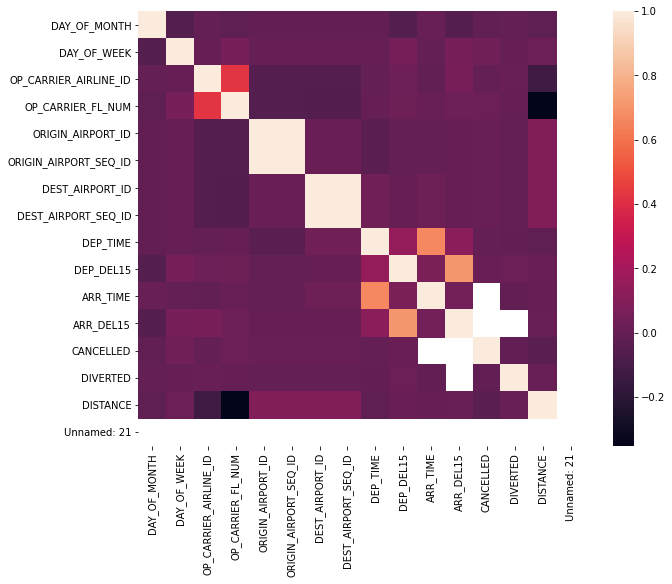

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df2020.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)